In [1]:
import xarray as xr 
import matplotlib.pyplot as plt 
import numpy as np 
from numpy import linalg as LA

import cartopy.crs as ccrs 
import cartopy.mpl.ticker as cticker 
from cartopy.util import add_cyclic_point

from clim_utils import rmm

### Zonal wind Data
era-interim Daily u850 '/shared/ccsm4/khuang/obs/era-interim/era-interim.daily.u850.1979-2013.nc'
era-interim Daily u200 '/shared/ccsm4/khuang/obs/era-interim/era-interim.daily.u200.1979-2013.nc'

In [2]:
file = "/shared/ccsm4/khuang/obs/era-interim/era-interim.daily.u850.1979-2013.nc"
ds_u850 = xr.open_dataset(file)
ds_u850 

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 12784)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    u        (time, lat, lon) float32 ...

In [3]:
ds_u850=ds_u850.reindex(lat=list(reversed(ds_u850['lat'])))
ds_u850

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 12784)
Coordinates:
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    u        (time, lat, lon) float32 ...

In [4]:
file = "/shared/ccsm4/khuang/obs/era-interim/era-interim.daily.u200.1979-2013.nc"
ds_u200 = xr.open_dataset(file)
ds_u200

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 12784)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    u        (time, lat, lon) float32 ...

In [5]:
ds_u200=ds_u200.reindex(lat=list(reversed(ds_u200['lat'])))
ds_u200

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 12784)
Coordinates:
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    u        (time, lat, lon) float32 ...

### OLR Data
NOAA Daily OLR '/shared/ccsm4/khuang/obs/NOAA-OLR/NOAA.OLR.daily.mean.1979-2019.nc'

In [6]:
file='/shared/ccsm4/khuang/obs/NOAA-OLR/NOAA.OLR.daily.mean.1979-2019.nc'
ds_olr=xr.open_dataset(file)
ds_olr

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 16650)
Coordinates:
  * time     (time) datetime64[ns] 1974-06-01 1974-06-02 ... 2019-12-31
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (time, lat, lon) float32 ...

In [7]:
ds_olr=ds_olr.reindex(lat=list(reversed(ds_olr['lat'])))
ds_olr

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 16650)
Coordinates:
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * time     (time) datetime64[ns] 1974-06-01 1974-06-02 ... 2019-12-31
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (time, lat, lon) float32 ...

In [8]:
ds_olr=ds_olr.sel(time=slice(ds_u850['time'][0], ds_u850['time'][-1]))
ds_olr

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 12784)
Coordinates:
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (time, lat, lon) float32 ...

### Compute RMM index
`rmm`

In [9]:
ds_rmm,evar1,evar2 = rmm(ds_u850,ds_u200,ds_olr)

In [10]:
ds_rmm

<xarray.Dataset>
Dimensions:    (eof: 2, lon: 144, time: 12784, var: 3)
Coordinates:
  * var        (var) int64 1 2 3
  * eof        (eof) int64 1 2
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
Data variables:
    ceof       (var, eof, lon) float64 0.013 0.01238 0.01149 ... 0.05878 0.05833
    PC1        (time) float64 -0.9873 -1.4 -1.68 ... 0.1445 -0.2123 -0.2606
    PC2        (time) float64 1.297 1.453 1.533 1.423 ... 0.8893 0.6106 0.3947
    MJO_INDEX  (time) float64 3.889 3.867 3.825 3.77 ... 0.7741 0.775 0.7764

In [11]:
evar1,evar2

(13.175572181049668, 12.850261841063368)

### Plot EOF1

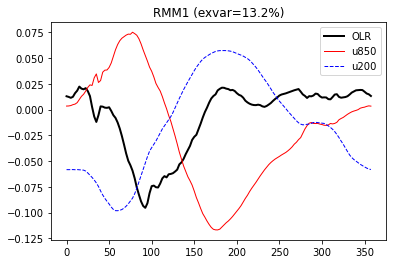

<Figure size 432x288 with 0 Axes>

In [12]:
lines = plt.plot(ds_rmm['lon'],ds_rmm['ceof'][0,0,:], ds_rmm['lon'],ds_rmm['ceof'][1,0,:], ds_rmm['lon'],ds_rmm['ceof'][2,0,:])  

plt.setp(lines[0], linewidth=2,color='black')  
plt.setp(lines[1], linewidth=1,color='red')  
plt.setp(lines[2], linestyle='--',linewidth=1,color='blue')  

plt.legend(('OLR', 'u850', 'u200'), loc='upper right')  
plt.title('RMM1 (exvar=13.2%)')  
plt.show()
plt.savefig('MJO_RMM_EOF1.png')

### Plot EOF2

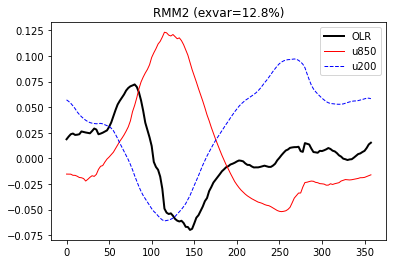

<Figure size 432x288 with 0 Axes>

In [13]:
lines = plt.plot(ds_rmm['lon'],ds_rmm['ceof'][0,1,:], ds_rmm['lon'],ds_rmm['ceof'][1,1,:], ds_rmm['lon'],ds_rmm['ceof'][2,1,:])  

plt.setp(lines[0], linewidth=2,color='black')  
plt.setp(lines[1], linewidth=1,color='red')  
plt.setp(lines[2], linestyle='--',linewidth=1,color='blue')  

plt.legend(('OLR', 'u850', 'u200'), loc='upper right')  
plt.title('RMM2 (exvar=12.8%)')  
plt.show()
plt.savefig('MJO_RMM_EOF2.png')

### Write .nc file

In [14]:
ds_rmm.to_netcdf('MJO_PC_INDEX.1979-2013.nc')